In [2]:
import pandas as pd
import altair as alt

In [133]:
df = pd.read_csv("http://opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net/2019-02-06/DEMOCRATIE_ET_CITOYENNETE.csv")

In [140]:
df.drop([
    "Quel pourrait être le rôle de chacun pour faire reculer les incivilités dans la société ?",
    "Quelles sont les discriminations les plus répandues dont vous êtes témoin ou victime ?",
    "Quelles sont les incivilités les plus pénibles dans la vie quotidienne et que faudrait-il faire pour lutter contre ces incivilités ?",
    "Que peuvent et doivent faire les pouvoirs publics pour répondre aux incivilités ?",
    "Que faudrait-il faire pour lutter contre ces discriminations et construire une société plus solidaire et plus tolérante ?",
    "Si oui, lesquelles ?",
    "Que pensez-vous de la situation de l'immigration en France aujourd'hui et de la politique migratoire ? Quelles sont, selon vous, les critères à mettre en place pour définir la politique migratoire ?",
    "Comment garantir le respect par tous de la compréhension réciproque et des valeurs intangibles de la République ?",
    "Que faudrait-il faire aujourd'hui pour renforcer l'engagement citoyen dans la société ?",
    "Quels sont les comportements civiques qu'il faut promouvoir dans notre vie quotidienne ou collective ?",
    "Que faudrait-il faire pour favoriser le développement de ces comportements civiques et par quels engagements concrets chacun peut-il y participer ?",
    "Que faudrait-il faire pour valoriser l'engagement citoyen dans les parcours de vie, dans les relations avec l'administration et les pouvoirs publics ?",
    "En matière d'immigration, une fois nos obligations d'asile remplies, souhaitez-vous que nous puissions nous fixer des objectifs annuels définis par le Parlement ?",
    "Que proposez-vous afin de répondre à ce défi qui va durer ?",
    "Quelles sont, selon vous, les modalités d'intégration les plus efficaces et les plus justes à mettre en place aujourd'hui dans la société ?",
    "Y a-t-il d'autres points sur la démocratie et la citoyenneté sur lesquels vous souhaiteriez vous exprimer ?",
    "Que faudrait-il faire aujourd'hui pour mieux associer les citoyens aux grandes orientations et à la décision publique ? Comment mettre en place une démocratie plus participative ?",
    "Que faudrait-il faire pour consulter plus directement les citoyens sur l'utilisation de l'argent public, par l'Etat et les collectivités ?",
    "Si oui, comment ?",
    "Que faudrait-il faire pour consulter plus directement les citoyens sur l'utilisation de l'argent public, par l'Etat et les collectivités ?",
    "Quel rôle nos assemblées, dont le Sénat et le Conseil économique, social et environnemental, doivent-elles jouer pour représenter nos territoires et la société civile ?",
    "Que proposez-vous pour renforcer les principes de la laïcité dans le rapport entre l'Etat et les religions de notre pays ?",
    "Pourquoi ?",
    "Que faudrait-il faire pour mieux représenter les différentes sensibilités politiques ?",
    "Si oui, lesquels ?",
    "En qui faites-vous le plus confiance pour vous faire représenter dans la société et pourquoi ?",
    "Que pensez-vous de la participation des citoyens aux élections et comment les inciter à y participer davantage ?",
    "Si oui, à quel type d'associations ou d'organisations ? Et avec quel rôle ?",
    "Que faudrait-il faire pour renouer le lien entre les citoyens et les élus qui les représentent ?",
    "Si oui, de quelle manière ?",
    ],
    axis=1,
    errors="ignore",
    inplace=True
)

#df.describe(include="all")

In [135]:
df2 = df.melt(
    id_vars=["reference", "title", "createdAt", "publishedAt", "updatedAt", "trashed", "trashedStatus", "authorId", "authorType", "authorZipCode"],
    var_name="question",
    value_name="reponse"
)

In [137]:
brut = df2.groupby(["question", "reponse"]).count()

brut.drop(brut.columns.difference(['reference']), axis=1, inplace=True)

In [138]:
pct = brut.groupby(level=0).apply(lambda x: 100 * x / float(x["reference"].sum()))

pct

reference
question                                           reponse                      
En dehors des élus politiques, faut-il donner u... Non                 41.835375
                                                   Oui                 58.164625
Faut-il faciliter le déclenchement du référendu... Je ne sais pas      20.187839
                                                   Non                 26.515225
                                                   Oui                 53.296935
Faut-il les transformer ?                          Non                 12.793037
                                                   Oui                 87.206963
Faut-il prendre en compte le vote blanc ?          Non                 17.393936
                                                   Oui                 82.606064
Le non-cumul des mandats instauré en 2017 pour ... Je ne sais pas      10.115132
                                                   Une bonne chose     75.705339
                                                   Une mauvaise chose  14.179529
Pensez-vous qu'il faille instaurer des contrepa... Non                 26.986540
                                                   Oui                 73.013460
Pensez-vous qu'il serait souhaitable de réduire... Non                 26.505786
                                                   Oui                 73.494214

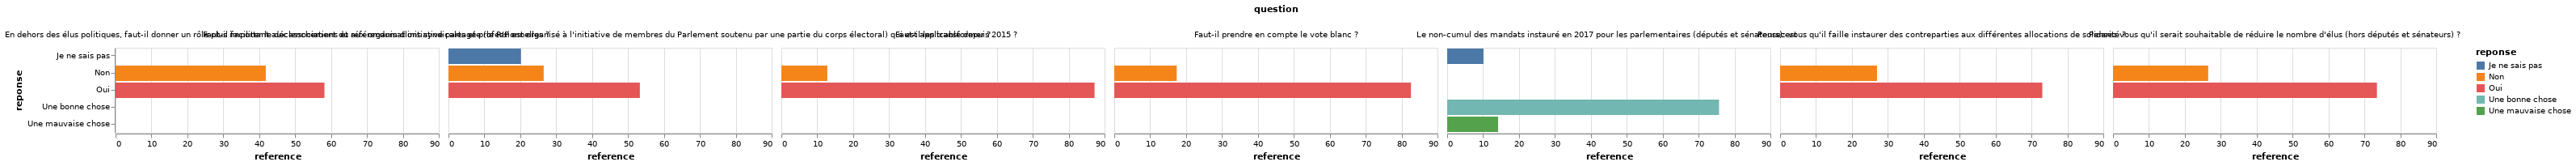

In [139]:
alt.Chart(pct.reset_index()).mark_bar().encode(
    x="reference:Q",
    y="reponse:N",
    color="reponse:N",
    column="question:N"
)